In [1]:
# read file 

In [9]:
from PYmodule import *

In [10]:
(t_from_z(1)-t_from_z(0.9))/Myr

-478.06483921198986

## some slopes 

In [52]:
from scipy.optimize import curve_fit

# ----------------------------------------------------------------
#                     fitting rho v.s. z
# ----------------------------------------------------------------
#  fitting function, rho=rho_0*10^(k(z-6))
def func(z, logrho0, k):
    return logrho0 + k*(z-6.)

zs = np.arange(6,11)
i=0
linestyles = {0.1:'-',0.01:'--'}
for M_mag in [-23,-24,-25,-26,-27]:
    mag_label = str(abs(M_mag))
    for f_seed in [0.1,0.01]:
        n_mag = {'23':[], '24':[], '25':[], '26':[], '27':[]}
        n_mag_min = {'23':[], '24':[], '25':[], '26':[], '27':[]}
        n_mag_max = {'23':[], '24':[], '25':[], '26':[], '27':[]}
        f_seedlabel = 'f%d'%abs(int(np.log10(f_seed)))
        
        # from ndraw 60; use scatter
        prex = '../4p/M0r8_' + f_seedlabel # local
        for z in zs:
            fLname = prex+'linQLFz{:d}'.format(z)
            TL = ascii.read(fLname, guess=False, delimiter=' ')
            index = np.argmax(TL['M1450']>M_mag)
            n_mag    [mag_label].append(TL['y_best'][index]/1e9)
            n_mag_min[mag_label].append((TL['med'][index]-TL['spread'][index])/1e9)
            n_mag_max[mag_label].append((TL['med'][index]+TL['spread'][index])/1e9)

    popt, pcov = curve_fit(func, zs, np.log10(n_mag[mag_label]), sigma=None)
    logn0, kl = popt
    perr = np.sqrt(np.diag(pcov)) # error of fitted para, but better use MCMC
    print(mag_label,'kL: ',popt,'log10_rho0: ',perr)

print('fitting for f_seed=%.2f'%f_seed)


23 kL:  [-7.51053769 -0.62343102] log10_rho0:  [0.05393533 0.02201901]
24 kL:  [-7.90915986 -0.69576768] log10_rho0:  [0.06328567 0.02583627]
25 kL:  [-8.37444199 -0.76872197] log10_rho0:  [0.07315447 0.02986519]
26 kL:  [-8.90352476 -0.84187884] log10_rho0:  [0.08293316 0.03385732]
27 kL:  [-9.49117928 -0.91520973] log10_rho0:  [0.09364669 0.0382311 ]
fitting for f_seed=0.01


In [44]:
fslegend

20

# Niida Fig 10  \& each QLF( $\Phi$ in $\mathrm{Mpc^{-3} mag^{-1}}$ ) at each magnitude 

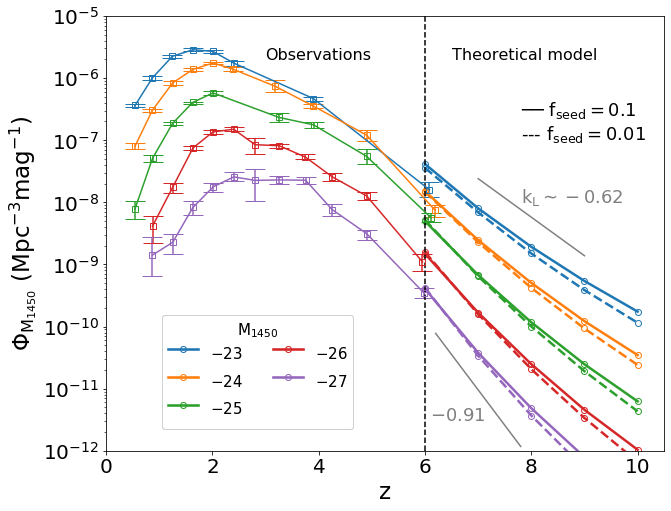

In [59]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 8))

zs = np.arange(6,11)
i=0
linestyles = {0.1:'-',0.01:'--'}
for M_mag in [-23,-24,-25,-26,-27]:
    mag_label = str(abs(M_mag))
    T_Niida = ascii.read(datapre+'mag'+mag_label+'.csv', guess=False, header_start=-1,delimiter=',',names=['z','phi'])
    # data from WebPlotDigitizer; not sorted; every three dots may not the same z
    T_Niida.sort('z')
    z_Niida = np.mean(np.array([T_Niida['z'][::3],T_Niida['z'][1::3],T_Niida['z'][2::3]]),axis=0)
    phi_Niida = np.median([T_Niida['phi'][::3],T_Niida['phi'][1::3],T_Niida['phi'][2::3]],axis=0)
    phimin_Niida = np.min([T_Niida['phi'][::3],T_Niida['phi'][1::3],T_Niida['phi'][2::3]],axis=0)
    phimax_Niida = np.max([T_Niida['phi'][::3],T_Niida['phi'][1::3],T_Niida['phi'][2::3]],axis=0)
    # Niida Fig.10 data w/ errorbar
    ax.errorbar(z_Niida,pow(10,phi_Niida),
                yerr=[pow(10,phi_Niida)-pow(10,phimin_Niida),
                      pow(10,phimax_Niida)-pow(10,phi_Niida)],
                marker='s',fillstyle='none',capsize=10,c='C%d'%i)
    for f_seed in [0.1,0.01]:
        n_mag = {'23':[], '24':[], '25':[], '26':[], '27':[]}
        n_mag_min = {'23':[], '24':[], '25':[], '26':[], '27':[]}
        n_mag_max = {'23':[], '24':[], '25':[], '26':[], '27':[]}
        f_seedlabel = 'f%d'%abs(int(np.log10(f_seed)))
        
        # from ndraw 60; use scatter
        prex = '../4p/M0r8_' + f_seedlabel # local
        for z in zs:
            fLname = prex+'linQLFz{:d}'.format(z)
            TL = ascii.read(fLname, guess=False, delimiter=' ')
    #         print(TL['y_best'][np.argmax(TL['M1450']>M_mag)])
            index = np.argmax(TL['M1450']>M_mag)
            n_mag    [mag_label].append(TL['y_best'][index]/1e9)
            n_mag_min[mag_label].append((TL['med'][index]-TL['spread'][index])/1e9)
            n_mag_max[mag_label].append((TL['med'][index]+TL['spread'][index])/1e9)
#            # quite large error bars
#         ax.errorbar(zs,n_mag[mag_label],
#                     yerr=[np.array(n_mag[mag_label])-np.array(n_mag_min[mag_label]),
#                           np.array(n_mag_max[mag_label])-np.array(n_mag[mag_label])],
#                     marker='o',fillstyle='none',capsize=10,c='C%d'%i,linestyle=linestyles[f_seed])
        ax.plot(zs,n_mag[mag_label],
               # ax.errorbar paras:
#                yerr=[np.array(n_mag[mag_label])-np.array(n_mag_min[mag_label]),
#                      np.array(n_mag_max[mag_label])-np.array(n_mag[mag_label])],
#                capsize=10,
                lw = 2.5,
                label = '$-$'+mag_label if f_seed==0.1 else '_',
                marker='o',fillstyle='none',c='C%d'%i,linestyle=linestyles[f_seed])
    
    i += 1

#-------------------------------------------------------
xslope1 = np.linspace(7,9)
xslope2 = np.linspace(6.2,7.8)
# rho=rho_0*10^(k(z-6))
yslope1 = pow(10, -7 -0.62*(xslope-6))
yslope2 = pow(10, -9.2 -0.91*(xslope-6))

#  fitting function, rho=rho_0*10^(k(z-6))
def func(z, logrho0, k):
    return logrho0 + k*(z-6.)
# 27 [-9.49117928 -0.91520973] [0.09364669 0.0382311 ]

ax.plot(xslope1,yslope1,c='grey')
ax.plot(xslope2,yslope2,c='grey')
ax.text(7.8,1e-8,r"$\mathrm{k_L\sim -0.62}$",fontsize=fslegend-2,color='grey')
ax.text(6.1,3e-12,"$-0.91$",fontsize=fslegend-2,color='grey')
# ----------------------------------------------------------

ax.set_xlim(0,10.5)
# ax.set_ylim(-3,3)
ax.set_ylim(1e-12,1e-5); 
ax.set_yscale('log') # set before tickers


legend1 = ax.legend(title=r'$\mathrm{M_{1450}}$',fontsize=15,loc=(.1,.05), # loc 用图片比例
                    ncol=2, handleheight=2.4, labelspacing=0.05) 
legend1.get_title().set_fontsize(str(15)) #legend 'Title' fontsize
plt.setp(plt.gca().get_legend().get_texts(), fontsize=str(15)) #legend 'list' fontsize


ax.add_artist(legend1)

ax.axvline(x=6,ls='--',c='k')
ax.text(7.8,2.5e-7,'\u2500'*2+' '+r"$\mathrm{f_{seed}=0.1}$",fontsize=18)
ax.text(7.8,1e-7,'--- '+r"$\mathrm{f_{seed}=0.01}$",fontsize=18)
ax.text(3,2e-6,'Observations',fontsize=16)
ax.text(6.5,2e-6,'Theoretical model',fontsize=16)

locmajy = LogLocator(base=10,numticks=100)
locminy = LogLocator(base=10,subs=np.arange(2, 10) * .1,numticks=100)
ax.yaxis.set_major_locator(locmajy)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(labelsize=fstick)

ax.set_xlabel('z',fontsize=fslabel)
ax.set_ylabel(r'$\mathrm{\Phi_{M_{1450}}~(Mpc^{-3}mag^{-1})}$',fontsize=fslabel)
fig.savefig(figpre+'QLFmag_z.pdf',dpi=400,bbox_inches='tight')
# plt.close() # show output or not

In [5]:
# test Table.sort function
T_ = ascii.read(datapre+'mag25.csv', guess=False, header_start=-1,delimiter=',',names=['z','phi'])

print(T_[-10::])
T_.sort('z')
print(T_[-5::])

  z      phi  
------ -------
3.2532 -6.6334
3.8996 -6.7981
3.9016 -6.7061
4.9001 -7.2599
4.9003 -7.1355
6.1155 -8.2492
6.1149 -8.1673
 6.111 -8.3236
3.9028 -6.7531
4.8999 -7.3827
  z      phi  
------ -------
4.9001 -7.2599
4.9003 -7.1355
 6.111 -8.3236
6.1149 -8.1673
6.1155 -8.2492


## prev